# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any LGAs over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


# To do:
### - consider value counts of vouchers
### - as a percent of population

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [3]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [4]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


__IEO__ - Index of Education and Occupation  
__IER__ - Index of Economic Resources  
__IRSAD__ - Index of Relative Socio-economic Advantage and Disadvantage  
__IRSD__ - Index of Relative Socio-economic Disadvantage

This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [5]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


In [6]:
sa_vouchers_scores.shape

(127526, 18)

In [21]:
sa_vouchers_scores.Voucher_Value.value_counts()

50    125000
30       596
40       595
45       421
20       321
35       239
25       165
15        44
10        40
31        29
13        19
41        19
5         14
32        10
49         5
34         5
27         3
39         1
Name: Voucher_Value, dtype: int64

---

# Section 1 & 2

1) Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out?  
2) Are some sports more popular in different parts of the state?

In [32]:
# Pivot table for voucher values
sa_grp = sa_vouchers_scores.pivot_table(index=['Participant_LGA'],
                                        columns='Voucher_Sport',
                                        values="Voucher_Value",
                                        aggfunc=np.sum)
sa_grp.head()

Voucher_Sport,Archery,Athletics,Australian Rules,BMX,Badminton,Baseball,Basketball,Bowls,Calisthenics,Cricket,...,Surf Riding,Swimming,Table Tennis,Taekwondo,Tennis,Touch,Volleyball,Water Polo,Weightlifting,Wrestling
Participant_LGA,,,,,,,,,,,,,,,,,,,,,
ADELAIDE,NaN,800.0,6500.0,NaN,NaN,50.0,200.0,NaN,50.0,100.0,...,NaN,NaN,NaN,550.0,200.0,NaN,NaN,NaN,NaN,NaN
ADELAIDE HILLS,150.0,10200.0,70600.0,100.0,NaN,550.0,2320.0,NaN,3100.0,6400.0,...,NaN,900.0,150.0,2200.0,12730.0,100.0,50.0,50.0,NaN,NaN
ADELAIDE PLAINS,NaN,150.0,24250.0,NaN,NaN,150.0,750.0,NaN,1150.0,150.0,...,NaN,150.0,NaN,NaN,650.0,NaN,NaN,NaN,NaN,NaN
ALEXANDRINA,450.0,3100.0,49000.0,200.0,150.0,NaN,10130.0,NaN,250.0,400.0,...,100.0,550.0,NaN,NaN,5410.0,NaN,NaN,NaN,NaN,NaN
BAROSSA,NaN,7900.0,59800.0,150.0,NaN,300.0,17050.0,NaN,450.0,2800.0,...,NaN,600.0,NaN,NaN,3795.0,NaN,NaN,NaN,NaN,NaN


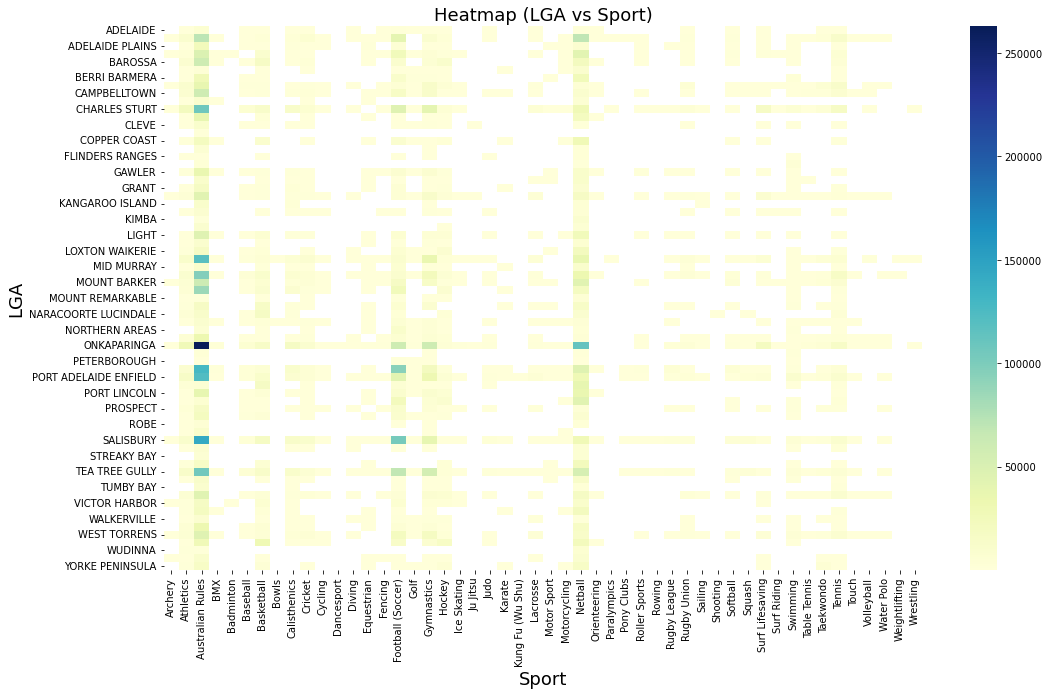

In [9]:
plt.figure(figsize=(17,10))
grid = sns.heatmap(sa_grp,cmap='YlGnBu')
grid.set_title(label='Heatmap (LGA vs Sport)',fontsize=18)
grid.set_ylabel('LGA',fontsize=18)
grid.set_xlabel('Sport',fontsize=18)
plt.show()

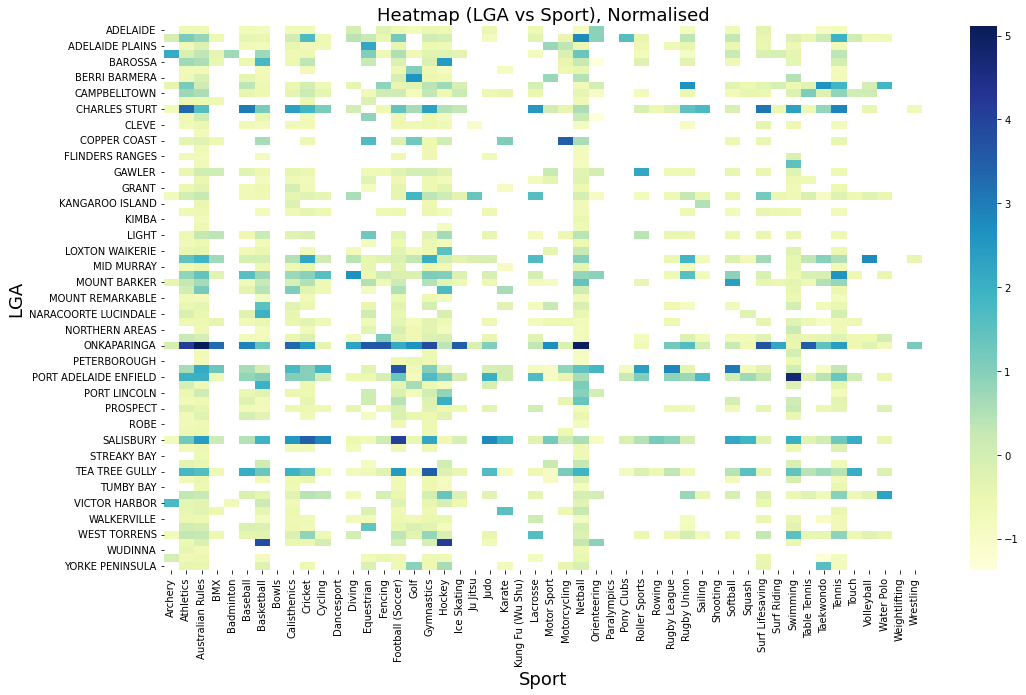

In [10]:
# Normalised values to account for significant differences

sa_grp_norm = (sa_grp - sa_grp.mean()) / sa_grp.std()

plt.figure(figsize=(17,10))
gridnorm = sns.heatmap(sa_grp_norm,cmap='YlGnBu')
gridnorm.set_title(label='Heatmap (LGA vs Sport), Normalised',fontsize=18)
gridnorm.set_ylabel('LGA',fontsize=18)
gridnorm.set_xlabel('Sport',fontsize=18)
plt.show()

### Initial Analysis

- What initially stands out is Onkaparinga, which appears to be heavily involved in a lot of different sports relative to the other LGAs. Meanwhile, other LGAs like Wudinna or Kimba only involve in very little sports.

- It is also worth noting that almost no one in South Australia gets involved in Dancesport, Kung Fu (Wu Shu), Paralympics, and Weightlifting.

- Australian Rules seem to be the most famous sport in South Australia, especially in Onkaparinga, while netball seems to be the top 2 sport in that LGA.

### Further considerations
- What about population? 
- Does geographical location have an effect? Map out the data
- Can we cluster them with Kmeans?

In [40]:
# Calculate voucher rate per LGA 

sa_vouchers_scores.pivot_table(index=) # try aggfunc for valuecount per max population


In [75]:
# Pivot table for voucher rate

sa_grp_pct = sa_vouchers_scores.pivot_table(index=['Participant_LGA'],
                                        values=["Voucher_Value","Population"],
                                        aggfunc={'Voucher_Value': 'count',
                                                 'Population': max},
                                             fill_value=0)
sa_grp_pct.head()

sa_grp_pct.columns=['Population', 'Voucher_count']
sa_grp_pct['Voucher_pct'] = sa_grp_pct.Voucher_count/ sa_grp_pct.Population *100
sa_grp_pct.replace(np.inf,np.nan,inplace=True)
sa_grp_pct.dropna(inplace=True)
sa_grp_pct.head()

,Population,Voucher_count,Voucher_pct
Participant_LGA,,,
ADELAIDE,19606.0,302,1.540345
ADELAIDE HILLS,38601.0,4756,12.320924
ALEXANDRINA,23693.0,2979,12.573334
BAROSSA,22174.0,2874,12.961126
BARUNGA WEST,2467.0,333,13.498176


<AxesSubplot:ylabel='Participant_LGA'>

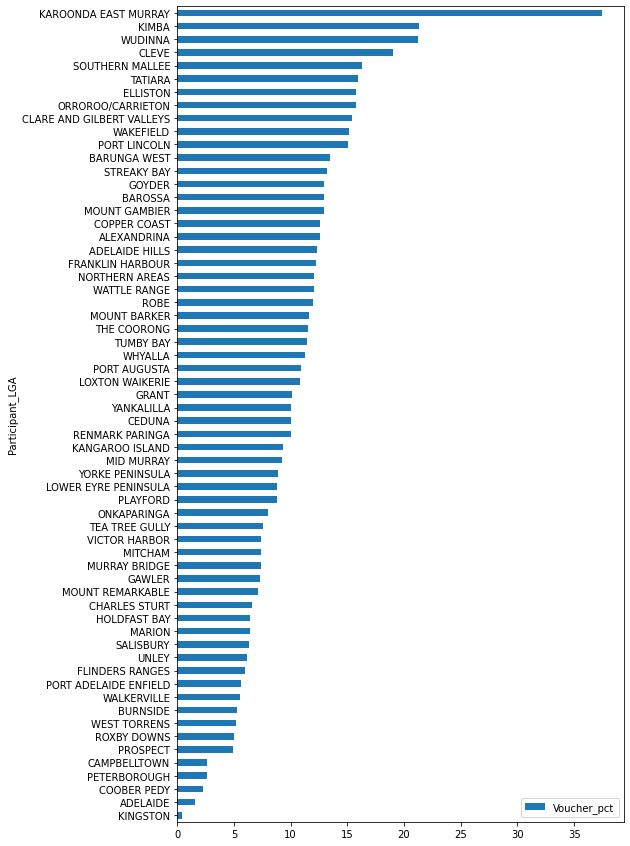

In [94]:

sa_grp_pct.sort_values('Voucher_pct').plot(kind='barh',y='Voucher_pct', figsize=(8,15))

In [ ]:
plt.figure(figsize=(17,10))
grid_count = sns.heatmap(sa_grp,cmap='YlGnBu')
grid.set_title(label='Heatmap (LGA vs Sport)',fontsize=18)
grid.set_ylabel('LGA',fontsize=18)
grid.set_xlabel('Sport',fontsize=18)
plt.show()

In [27]:
# Population

sa_vouchers_scores.groupby('Participant_LGA')[['Population']].max()

,Population
Participant_LGA,
ADELAIDE,19606.0
ADELAIDE HILLS,38601.0
ADELAIDE PLAINS,NaN
ALEXANDRINA,23693.0
BAROSSA,22174.0
...,...
WEST TORRENS,54932.0
WHYALLA,22070.0
WUDINNA,1256.0


---

# Section 3

Are any LGAs over/under represented in their use of vouchers?

# Section 4

Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

In [11]:
set(sa_vouchers_scores.Voucher_Claim_Year)

{2015, 2016, 2017}

In [12]:
# Total Voucher Use per LGA
# corr with SEIFA
sa_vouchers_total = sa_vouchers_scores.groupby('Participant_LGA').sum()[['Voucher_Value']]
sa_vouchers_total

,Voucher_Value
Participant_LGA,
ADELAIDE,15100
ADELAIDE HILLS,237570
ADELAIDE PLAINS,44841
ALEXANDRINA,148790
BAROSSA,143335
...,...
WEST TORRENS,142120
WHYALLA,120347
WUDINNA,10190


In [13]:
sa_index = sa_vouchers_scores.groupby('Participant_LGA').mean()[['IEO','IER','IRSAD','IRSD']]
sa_index.head()

,IEO,IER,IRSAD,IRSD
Participant_LGA,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0
ADELAIDE PLAINS,NaN,NaN,NaN,NaN
ALEXANDRINA,1000.0,1000.0,969.0,987.0
BAROSSA,1028.0,1028.0,997.0,1017.0


In [14]:
# The following don't have index scores
sa_index[sa_index.isna().any(axis=1)]

,IEO,IER,IRSAD,IRSD
Participant_LGA,,,,
ADELAIDE PLAINS,NaN,NaN,NaN,NaN
BERRI BARMERA,NaN,NaN,NaN,NaN
LIGHT,NaN,NaN,NaN,NaN
NARACOORTE LUCINDALE,NaN,NaN,NaN,NaN
NO LGA,NaN,NaN,NaN,NaN
NORWOOD PAYNEHAM AND ST PETERS,NaN,NaN,NaN,NaN
PORT PIRIE,NaN,NaN,NaN,NaN


In [15]:
sa_index.dropna(inplace=True)
sa_index.isna().sum()

IEO      0
IER      0
IRSAD    0
IRSD     0
dtype: int64

In [16]:
sa_voucherindex = sa_vouchers_total.join(sa_index,on='Participant_LGA',how='inner')
sa_voucherindex

,Voucher_Value,IEO,IER,IRSAD,IRSD
Participant_LGA,,,,,
ADELAIDE,15100,874.0,874.0,1036.0,1013.0
ADELAIDE HILLS,237570,1083.0,1083.0,1077.0,1081.0
ALEXANDRINA,148790,1000.0,1000.0,969.0,987.0
BAROSSA,143335,1028.0,1028.0,997.0,1017.0
BARUNGA WEST,15785,981.0,981.0,940.0,954.0
...,...,...,...,...,...
WEST TORRENS,142120,949.0,949.0,989.0,998.0
WHYALLA,120347,905.0,905.0,897.0,905.0
WUDINNA,10190,1008.0,1008.0,999.0,1023.0


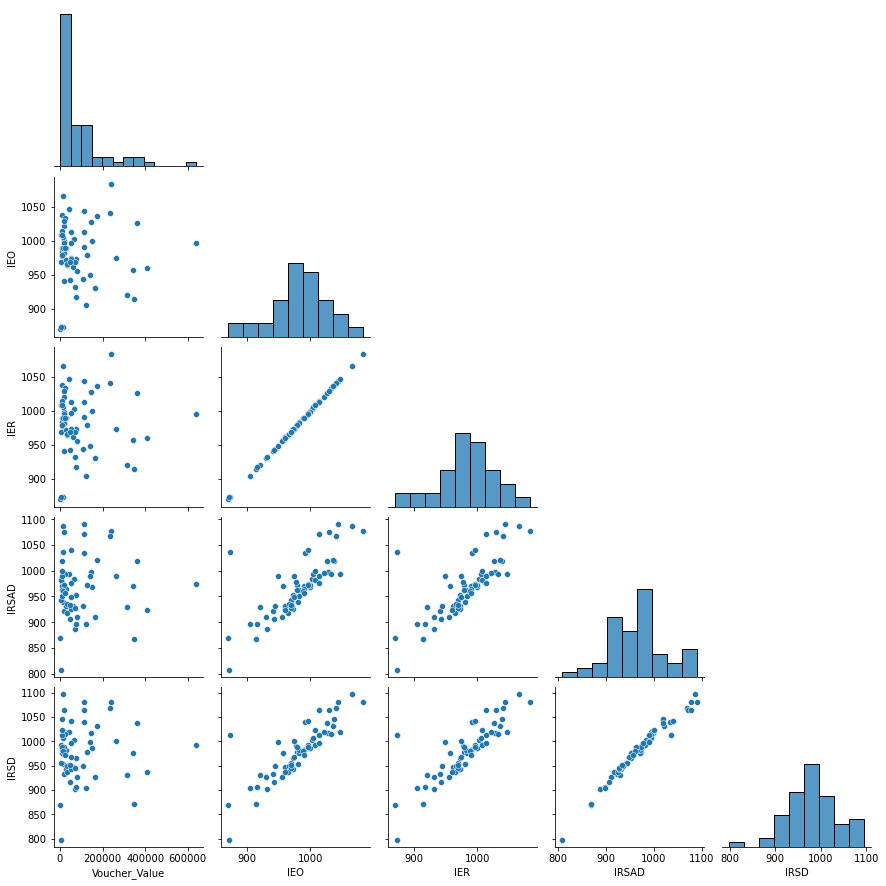

In [31]:
# sns.distplot(sa_voucherindex.IEO)
# sns.distplot(sa_voucherindex.IER)
sns.pairplot(sa_voucherindex,corner=True)

#### Use linear model to predict voucher value
Need to transform voucher value

In [19]:
sa_voucherindex.corr()

,Voucher_Value,IEO,IER,IRSAD,IRSD
Voucher_Value,1.000000,0.001082,0.001082,0.046831,0.027798
IEO,0.001082,1.000000,1.000000,0.781360,0.848105
IER,0.001082,1.000000,1.000000,0.781360,0.848105
IRSAD,0.046831,0.781360,0.781360,1.000000,0.985054
IRSD,0.027798,0.848105,0.848105,0.985054,1.000000


## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [ ]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

In [ ]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()